In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
from torch.utils.data.dataset import TensorDataset

## our dataset

we create a function of two variables x1 and x2, that outputs one number

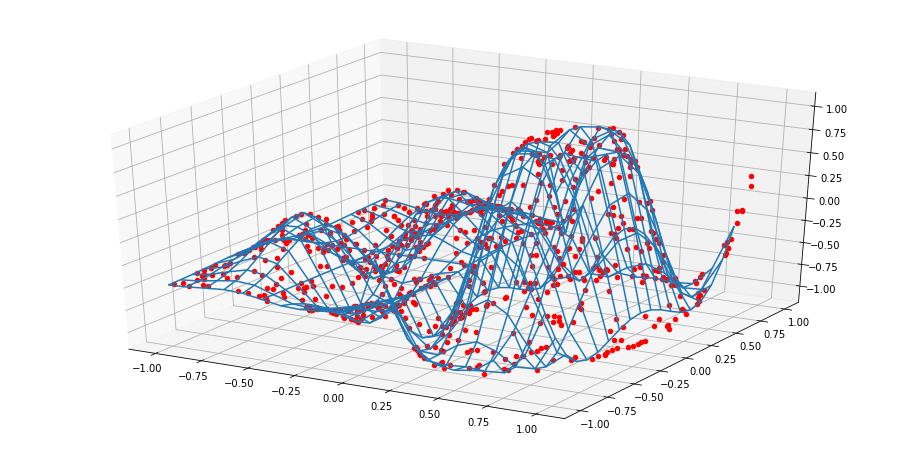

In [3]:
def func(x1_,x2_):
    if x1_ < 0:
        x1 = 2*( (x1_+1)*2-1 )
        x2 = 2*x2_
        return 3*x1*x2*np.exp(-x1**2-x2**2)-0.5
    else:
        x1 = 5*( x1_*2-1 )
        x2 = 5*x2_
        return np.sin(np.sqrt(x1**2+x2**2))

X1_ = np.arange(-1, 1, 0.1)
X2_ = np.arange(-1, 1, 0.1)
X1, X2 = np.meshgrid(X1_, X2_)

Y = np.zeros(X1.shape)
for i, x1_i in enumerate(X1_):
    for j, x2_i in enumerate(X2_):
        Y[j][i] = func(x1_i,x2_i)

x1x2 = np.random.rand(10000,2)*2.0-1.0

fig = plt.figure(figsize=(16,8))

ax = fig.add_subplot(1,1,1,projection='3d')
ax.plot_wireframe(X1, X2, Y)

for samp in x1x2[:800]:
    
    ax.scatter(samp[0],samp[1],func(samp[0],samp[1]),c='r')



plt.show()

## create our training dataset in the form of input X and output y

In [11]:
df = pd.DataFrame(x1x2,columns=['x1','x2'])

df['X'] = [ np.array([x1,x2]) for  x1,x2 in zip(df.x1,df.x2)  ]
df['y'] = [ func(x1,x2) for x1,x2 in zip(df.x1,df.x2) ]

df = df.drop('x1',axis=1).drop('x2',axis=1)
df

,X,y
0,"[0.9685711678270779, 0.6935581981643988]",-0.438404
1,"[-0.9093060620920574, -0.15484445374443223]",-0.405294
2,"[0.7784606405926, 0.32044345628040927]",-0.071000
3,"[0.7120653989028474, 0.4031912796977766]",0.213964
4,"[0.9339005599349683, 0.07138911582725682]",-0.936345
5,"[-0.5822701852407648, -0.9830089286982686]",-0.463497
6,"[0.41434528121686487, 0.6144779603211084]",-0.047943
7,"[-0.8910005504350722, -0.44893708735847304]",-0.337023
8,"[-0.024703363366739506, 0.38052893208800653]",-0.434498
9,"[0.7832316673068822, 0.2876196958680928]",-0.034899


## pytorch basics: a tensor

here we create a 1d tensor of shape (2)

In [13]:
x = torch.FloatTensor([3.8,4.2])


print('x.shape ',x.shape)
print('x[0] ', x[0])
print('x[1] ', x[1])

x.shape  torch.Size([2])
x[0]  tensor(3.8000)
x[1]  tensor(4.2000)


## pytorch basics: a layer

a layer takes input and gives some output, in this case, take in a 2 number tensor and output a 10 number tensor

In [14]:
my_first_layer = nn.Linear(2,10)

my_first_layer(x)

tensor([-0.2060, -0.1656, -0.0349, -1.1698, -0.3023, -0.2758,  2.0599,  1.5954,
         1.8920,  1.3068], grad_fn=<AddBackward0>)

## an activation function

this object can take a torch tensor of arbitrary size, and apply some function to each of it's elements

we can chain these objects together, so we input x to our layer, and input the layer output to our activation function

In [15]:
activation1 = nn.ReLU()

activation1( my_first_layer(x) )

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 2.0599, 1.5954, 1.8920,
        1.3068], grad_fn=<ThresholdBackward0>)

## we can create another layer, and put everything together

this layer will take as input 10 numbers, and output 1 number
we created a function that takes us from two numbers to one number, just like our dataset requires

In [16]:
layer2 = nn.Linear(10,1)

layer2(activation1( my_first_layer(x) ))

tensor([-0.6418], grad_fn=<AddBackward0>)

## a final activation function

our function output is between -1 and 1, so we can use the Tanh activation on the final output to make sure the output is also in that range

In [17]:
activation2 = nn.Tanh()

activation2(layer2(activation1( my_first_layer(x) )))

tensor([-0.5662], grad_fn=<TanhBackward>)

## what is in these layers?

these are "linear" layers
the first layer we created went from 2 numbers to 10 numbers
inside there is a 10x2 matrix and a vector of size 10
the values of these elements is randomly selected when we create the layer

In [18]:
for p in my_first_layer.parameters():
    print(p)
    print(p.shape)
    print('----------')

Parameter containing:
tensor([[-0.6174,  0.6219],
        [-0.3231,  0.2650],
        [-0.5219,  0.4997],
        [-0.6588,  0.2961],
        [-0.4662,  0.3566],
        [-0.6004,  0.3371],
        [-0.1183,  0.4443],
        [ 0.3033,  0.1609],
        [ 0.3010,  0.1367],
        [ 0.3559,  0.1319]], requires_grad=True)
torch.Size([10, 2])
----------
Parameter containing:
tensor([-0.4716, -0.0512, -0.1506,  0.0897, -0.0284,  0.5901,  0.6437, -0.2332,
         0.1744, -0.5996], requires_grad=True)
torch.Size([10])
----------


## creating a neural network object

in order to "train" our weights pytorch has a special structure for "models"
let's put our building blocks into a object like this:

In [19]:
#this code defines the neural network
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        
        self.layer1 = nn.Linear(2,10)
        self.layer2 = nn.Linear(10,1)
        self.activation1 = nn.ReLU()
        self.activation2 = nn.Tanh()
        
    def forward(self,x):
        
        out = self.layer1(x)
        out = self.activation1(out)
        out = self.layer2(out)
        out = self.activation2(out)
        
        return out
    

In [43]:
#and this code creates a neural net based on the definition above
net = Net()

In [21]:
x

tensor([3.8000, 4.2000])

In [22]:
net(x)

tensor([-0.0032], grad_fn=<TanhBackward>)

## let's see what our neural network predicts with totally random weights

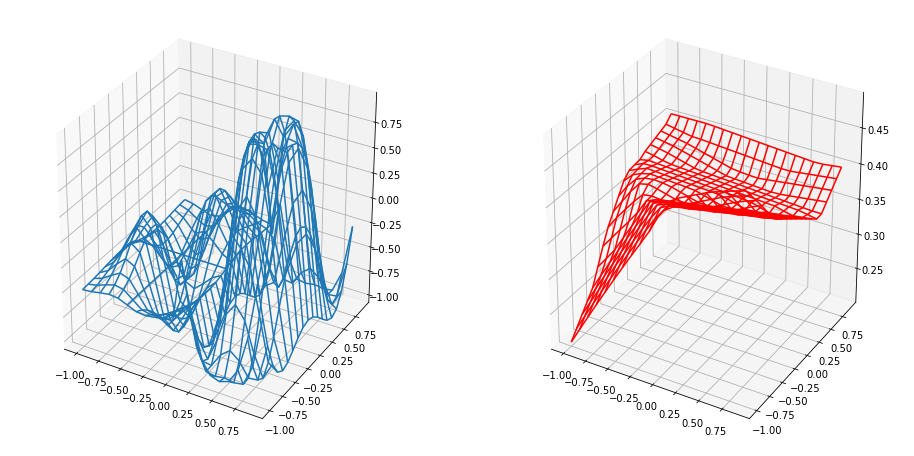

In [44]:


X1_ = np.arange(-1, 1, 0.1)
X2_ = np.arange(-1, 1, 0.1)
X1, X2 = np.meshgrid(X1_, X2_)

fig = plt.figure(figsize=(16,8))

ax = fig.add_subplot(1,2,1,projection='3d')
ax.plot_wireframe(X1, X2, Y)

ax2 = fig.add_subplot(1,2,2,projection='3d')    
x1 = np.arange(-1, 1, 0.1)
x2 = np.arange(-1, 1, 0.1)
Yprime = np.zeros(Y.shape)
for i, x1_i in enumerate(x1):
    for j, x2_i in enumerate(x2):
        input_i = torch.FloatTensor([x1_i,x2_i])
        y_i = net(input_i)
        
        Yprime[j][i] = y_i
ax2.plot_wireframe(X1,X2,Yprime,color='r')


plt.show()

## let's convert our dataset to fastai friendly format

In [24]:
from fastai import *
from fastai.vision import *

In [25]:
len_train = 9000

x_full = torch.FloatTensor(df.X)
y_full = torch.FloatTensor(df.y).view(len(df),1)

x_train = x_full[:len_train]
y_train = y_full[:len_train]

x_valid = x_full[len_train:]
y_valid = y_full[len_train:]


In [26]:
x_train.shape

torch.Size([9000, 2])

In [27]:
y_train.shape

torch.Size([9000, 1])

In [28]:
train_ds = TensorDataset(x_train,y_train)
valid_ds = TensorDataset(x_valid,y_valid)

data = DataBunch.create(train_ds, valid_ds, bs=50)

## define our loss function

In [29]:
loss_func = nn.MSELoss()

# create the "learner"

remember the learner holds the dataset, the neural net, and the loss function

In [45]:
learn = Learner(data, net, loss_func=loss_func)

see what the learning rate finder tells us:

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


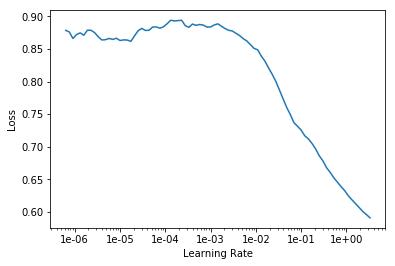

In [46]:
learn.lr_find()
learn.recorder.plot()

## train the network

In [47]:
learn.fit(10, 1e-02)

epoch,train_loss,valid_loss,time
0,0.226531,0.219973,00:00
1,0.202399,0.189835,00:00
2,0.177140,0.168087,00:00
3,0.153153,0.141617,00:00
4,0.121288,0.115734,00:00
5,0.102199,0.103475,00:00
6,0.094848,0.096028,00:00
7,0.092095,0.089249,00:00
8,0.087524,0.088812,00:00
9,0.081071,0.081229,00:00


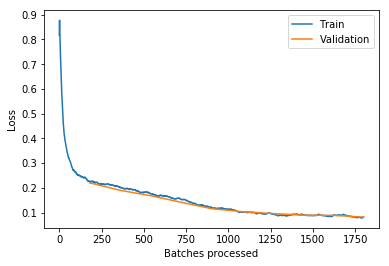

In [48]:
learn.recorder.plot_losses()

## let's see what the network predicts now

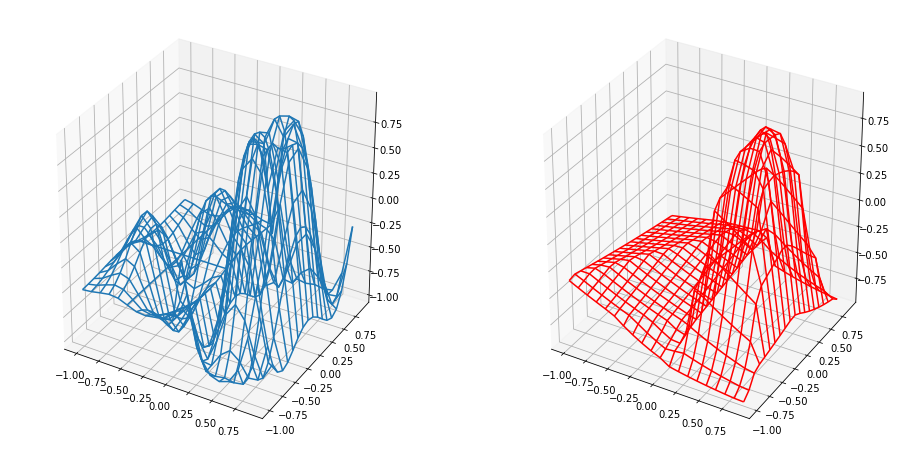

In [49]:


X1_ = np.arange(-1, 1, 0.1)
X2_ = np.arange(-1, 1, 0.1)
X1, X2 = np.meshgrid(X1_, X2_)

fig = plt.figure(figsize=(16,8))

ax = fig.add_subplot(1,2,1,projection='3d')
ax.plot_wireframe(X1, X2, Y)

ax2 = fig.add_subplot(1,2,2,projection='3d')    
x1 = np.arange(-1, 1, 0.1)
x2 = np.arange(-1, 1, 0.1)
Yprime = np.zeros(Y.shape)
for i, x1_i in enumerate(x1):
    for j, x2_i in enumerate(x2):
        input_i = torch.FloatTensor([x1_i,x2_i])
        y_i = net(input_i)
        
        Yprime[j][i] = y_i
ax2.plot_wireframe(X1,X2,Yprime,color='r')


plt.show()

In [50]:
for p in net.parameters():
    print(p)
    print(p.shape)
    print(len(p.view(-1)))
    print('----------')
    
sum([len(p.view(-1)) for p in net.parameters()])

Parameter containing:
tensor([[-0.5350, -0.5485],
        [-0.8348,  0.0297],
        [ 3.0176, -0.1387],
        [-0.5539, -0.7421],
        [-0.5887,  0.8182],
        [ 0.9744, -0.5511],
        [-0.0300,  0.2982],
        [ 1.7625,  0.8230],
        [ 1.5738, -0.7138],
        [ 0.0712, -0.3448]], requires_grad=True)
torch.Size([10, 2])
20
----------
Parameter containing:
tensor([ 0.5000,  0.7359, -0.3794,  0.4250,  0.5145,  0.4704, -0.4259, -0.9388,
        -0.8202, -0.5333], requires_grad=True)
torch.Size([10])
10
----------
Parameter containing:
tensor([[-0.3802,  0.7324,  2.3530, -0.3189, -0.8104, -0.7396,  0.1297, -3.9844,
         -4.3265, -0.1463]], requires_grad=True)
torch.Size([1, 10])
10
----------
Parameter containing:
tensor([-0.0866], requires_grad=True)
torch.Size([1])
1
----------


41

## let's try a neural network with a few more parameters

our last network picked up the general features of our target function, but it's not perfect

In [51]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        
        self.layer1 = nn.Linear(2,100)
        self.activation1 = nn.ReLU()
        self.layer2 = nn.Linear(100,50)
        self.layer3 = nn.Linear(50,10)
        self.layer4 = nn.Linear(10,1)
        self.activation2 = nn.Tanh()
        
    def forward(self,x):
        
        out = self.layer1(x)
        out = self.activation1(out)
        out = self.layer2(out)
        out = self.activation1(out)
        out = self.layer3(out)
        out = self.activation1(out)
        out = self.layer4(out)
        out = self.activation2(out)
        
        return out
    
net = Net()

In [52]:
sum([len(p.view(-1)) for p in net.parameters()])


5871

In [53]:
net = Net()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


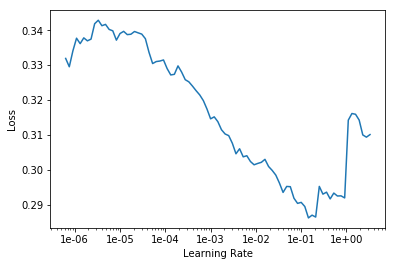

In [54]:
learn = Learner(data, net, loss_func=loss_func)
learn.lr_find()
learn.recorder.plot()

In [55]:
learn.fit(20, 1e-2)

epoch,train_loss,valid_loss,time
0,0.088309,0.068157,00:00
1,0.045650,0.048448,00:00
2,0.032961,0.042330,00:00
3,0.032892,0.039233,00:00
4,0.030330,0.046632,00:00
5,0.028886,0.048154,00:00
6,0.032801,0.038896,00:00
7,0.030791,0.038051,00:00
8,0.026106,0.036439,00:00
9,0.026296,0.037557,00:00


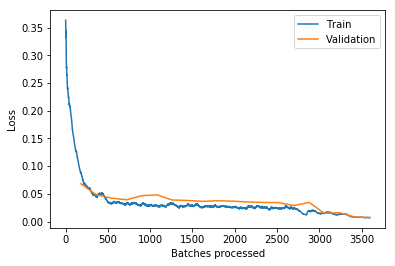

In [56]:
learn.recorder.plot_losses()

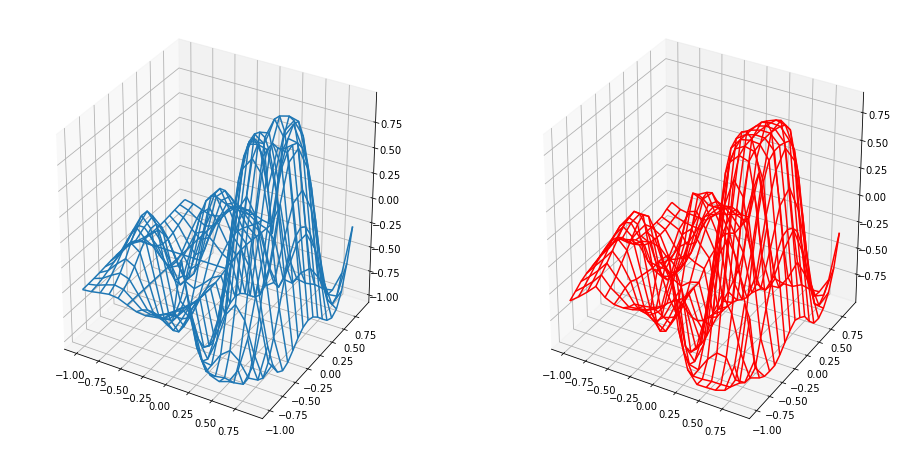

In [57]:

X1_ = np.arange(-1, 1, 0.1)
X2_ = np.arange(-1, 1, 0.1)
X1, X2 = np.meshgrid(X1_, X2_)

fig = plt.figure(figsize=(16,8))

ax = fig.add_subplot(1,2,1,projection='3d')
ax.plot_wireframe(X1, X2, Y)

ax2 = fig.add_subplot(1,2,2,projection='3d')    
x1 = np.arange(-1, 1, 0.1)
x2 = np.arange(-1, 1, 0.1)
Yprime = np.zeros(Y.shape)
for i, x1_i in enumerate(x1):
    for j, x2_i in enumerate(x2):
        input_i = torch.FloatTensor([x1_i,x2_i])
        y_i = net(input_i)
        
        Yprime[j][i] = y_i
ax2.plot_wireframe(X1,X2,Yprime,color='r')


plt.show()

## important comment about batches and layers

notice that we showed layers taking a single input, but they are designed to take multiple inputs and return multiple outputs

In [59]:
x = torch.FloatTensor([[0.2,0.3],[0.4,0.6],[0.8,-0.2]])

print(' x.shape ',x.shape)

my_first_layer = nn.Linear(2,10)

out = my_first_layer(x)

print('out shape ',out.shape)

 x.shape  torch.Size([3, 2])
out shape  torch.Size([3, 10])


## lets meet a few more kinds of layers

all are documented here: https://pytorch.org/docs/stable/nn.html

In [8]:
#Conv layer,

conv2d = nn.Conv2d(in_channels=3, out_channels=1, kernel_size=(3,3))

x = torch.rand((1,3,25,25))
print('x.shape ',x.shape)

y = conv2d(x)
print('y.shape ',y.shape)

x.shape  torch.Size([1, 3, 25, 25])
y.shape  torch.Size([1, 1, 23, 23])


In [9]:
x = torch.rand((1,3,256,256))
print('x.shape ',x.shape)

y = conv2d(x)
print('y.shape ',y.shape)

x.shape  torch.Size([1, 3, 256, 256])
y.shape  torch.Size([1, 1, 254, 254])


In [ ]:
maxpool = nn.MaxPool2d()

y2 = maxpool(y)
print('y2.shape ',y2.shape)

In [13]:
convTranspose = nn.ConvTranspose2d(in_channels=3, out_channels=3, kernel_size=(3,3),dilation=5)

x = torch.rand((1,3,32,32))
print('x.shape ',x.shape)

y = convTranspose(x)
print('y.shape ',y.shape)

x.shape  torch.Size([1, 3, 32, 32])
y.shape  torch.Size([1, 3, 42, 42])


In [14]:
emb = nn.Embedding(num_embeddings=5, embedding_dim=2)

In [24]:
x = torch.LongTensor([2])

emb(x)

tensor([[-0.3575,  1.4701]], grad_fn=<EmbeddingBackward>)